In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_lfw_people as flp

In [4]:
faces=flp(min_faces_per_person=50)

In [5]:
faces.data.shape

(1560, 2914)

In [6]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [7]:
faces.target_names.size

12

In [8]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

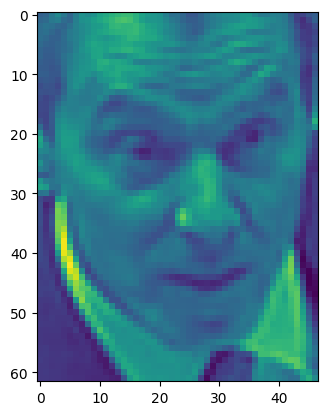

In [9]:
plt.imshow(faces.images[0])

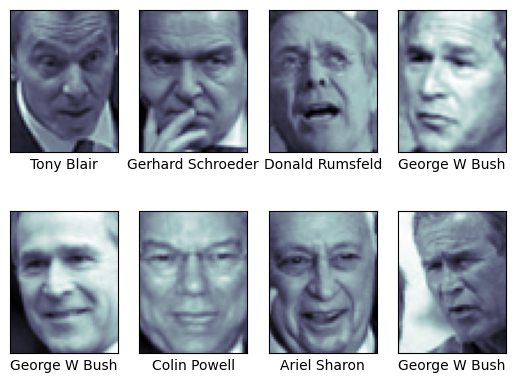

In [10]:
fig,ax=plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [11]:
faces.images[0].shape

(62, 47)

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [13]:
pcaModel=PCA(n_components=150,whiten=True)
svmModel=SVC(kernel='rbf',class_weight='balanced')
mdl=make_pipeline(pcaModel,svmModel)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,test_size=0.2)

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid=GridSearchCV(mdl,param_grid)

In [16]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [17]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [18]:
mdl=grid.best_estimator_

In [19]:
ypred=mdl.predict(xtest)

In [20]:
ytest

array([ 7,  7,  3,  4,  3,  3,  3,  0,  6,  2,  5,  3,  3,  3,  3,  3,  1,
       11,  1,  3,  3,  3,  3,  3, 10,  3,  2, 11,  3,  3,  3,  4, 10,  1,
        8,  6,  3,  3,  4,  1,  7,  9,  9,  1,  4,  4,  1,  0,  1,  8,  2,
        3, 10,  3,  3,  3,  4,  4, 11,  4,  4,  0,  9,  3,  1, 11,  1,  2,
        1,  1, 11,  8,  6,  3,  3,  2,  3,  3,  5,  4, 10,  3,  4,  4, 11,
        3,  7,  0,  4,  3,  1,  3,  3,  4,  2,  4,  3, 11,  4,  3,  2, 11,
        8,  2,  8, 11,  9, 10,  3,  8,  3,  1,  3,  3,  1,  8,  9,  1,  2,
        4,  3, 11,  3,  5,  2,  5,  1,  4,  2,  3,  3,  5,  3,  1,  3,  3,
        5,  3,  1,  3,  3,  3,  2,  3,  1,  4,  3,  1,  3,  1,  3,  1,  4,
        3,  2,  3,  1,  0, 11,  1,  3,  1,  3,  3,  2,  7,  3,  3,  6,  2,
        3,  2,  3,  3,  3,  8,  3,  3,  1,  3,  1, 11,  2,  3,  2, 11, 11,
       11,  0,  1, 11,  7,  1,  3,  1,  8,  3,  6,  1,  1,  9,  2,  0,  3,
        1,  1,  3,  2,  4,  6,  2,  4,  2,  3,  1,  3,  3, 11, 11,  3,  9,
        3, 11,  3,  3, 11

In [21]:
ypred

array([ 1,  7,  3,  4,  3,  3,  3,  0,  1,  2,  5,  3,  3,  3,  3,  3,  1,
       11,  1,  3,  3,  3,  1,  3, 10,  3,  3, 11,  3,  3,  3,  4,  1,  1,
        8,  6,  3,  3,  4,  7,  7,  9,  9,  3, 11,  4,  1,  0,  1,  8,  2,
        3, 10,  3,  3,  3,  4,  4, 11,  3,  4,  0,  9,  3,  1, 11,  1,  2,
        1,  1, 11,  4,  6,  3,  3,  3,  3,  3,  5,  4, 10,  3,  4,  4,  1,
        4,  4,  0,  4,  3,  1,  3,  3,  4,  2,  3,  3, 11,  4,  3,  3, 11,
        8,  2,  8,  3,  9, 10,  3,  0,  3,  1,  3,  1,  1,  3,  9,  3, 11,
        4,  3, 11,  3,  1,  2,  5,  3,  4,  2,  3,  3,  5,  3,  1,  3,  3,
        5,  3,  1,  3,  3, 11,  2,  3, 10,  4,  6,  1,  3,  1,  3,  1,  4,
        3,  2,  3,  1,  1, 11,  3,  3,  1,  3,  3,  2,  7,  3,  3,  6,  2,
        3,  3,  2,  3,  3,  8,  3,  3,  1,  3,  1, 11,  3,  1,  2, 11,  1,
       11,  0,  1, 11,  7,  1,  3,  1,  8,  3,  6,  1,  1,  9,  2,  0,  3,
        1,  1, 11,  2,  4,  6,  2,  4,  3,  3,  1,  3,  3,  4, 11,  3,  9,
        3, 11,  3,  3, 11

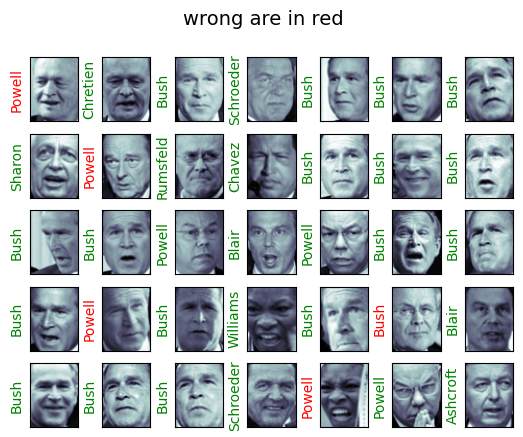

In [22]:
fig,ax=plt.subplots(5,7)
for idx, axidx in enumerate(ax.flat):
    axidx.imshow(xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[ypred[idx]].split()[-1],color='green' if ypred[idx]==ytest[idx] else 'red')
    fig.suptitle('wrong are in red',size=14)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(ytest,ypred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.92      0.86        13
     Colin Powell       0.76      0.80      0.78        51
  Donald Rumsfeld       0.89      0.65      0.76        26
    George W Bush       0.83      0.91      0.86       106
Gerhard Schroeder       0.81      0.81      0.81        26
      Hugo Chavez       1.00      0.82      0.90        11
   Jacques Chirac       0.62      0.71      0.67         7
    Jean Chretien       0.83      0.71      0.77         7
    John Ashcroft       1.00      0.54      0.70        13
Junichiro Koizumi       1.00      0.93      0.96        14
  Serena Williams       0.78      0.88      0.82         8
       Tony Blair       0.83      0.83      0.83        30

         accuracy                           0.83       312
        macro avg       0.85      0.79      0.81       312
     weighted avg       0.84      0.83      0.83       312

